<a href="https://colab.research.google.com/github/27Vaibhav/Heartdiseasepredictor/blob/main/Heartdiseaseprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import cufflinks as cf
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

In [5]:
from google.colab import drive

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
drive.mount('/content/drive')

In [4]:
heart=pd.read_csv('/content/drive/MyDrive/Data/heart.csv')

In [5]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    if i < len(heart.columns):
        print(heart.columns[i] + ":\t\t\t" + info[i])
    else:
        print("Extra info:\t\t\t" + info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [7]:
heart['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
heart.groupby('target').size()

target
0    138
1    165
dtype: int64

In [9]:
heart.groupby('target').sum()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,7811,114,66,18547,34650,22,62,19196,76,218.8,161,161,351
1,8662,93,227,21335,39968,23,98,26147,23,96.2,263,60,350


In [10]:
heart.shape

(303, 14)

In [11]:
heart.size

4242

In [12]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
heart['target'].unique()

array([1, 0])

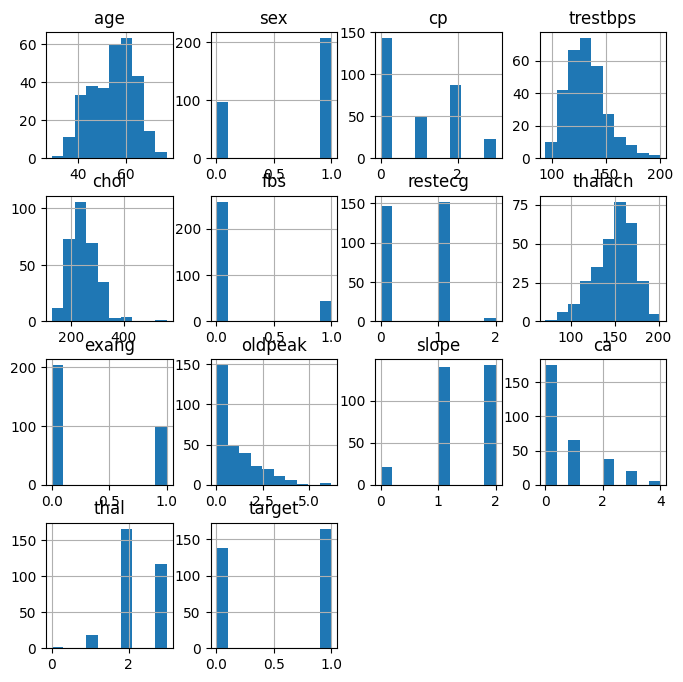

In [15]:
#Visualization
heart.hist(figsize=(8,8))
plt.show()

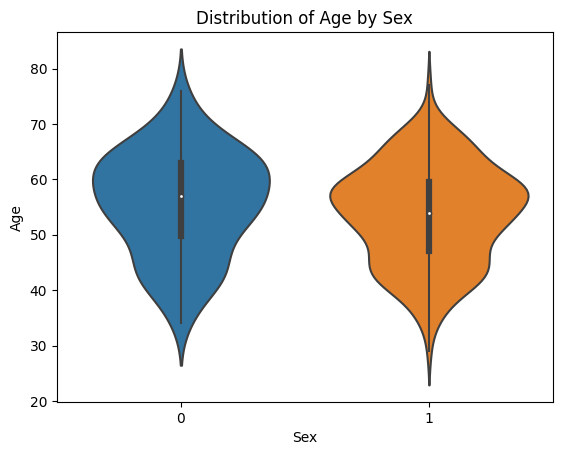

In [16]:
sns.violinplot(x='sex', y='age', data=heart)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.title('Distribution of Age by Sex')
plt.show()

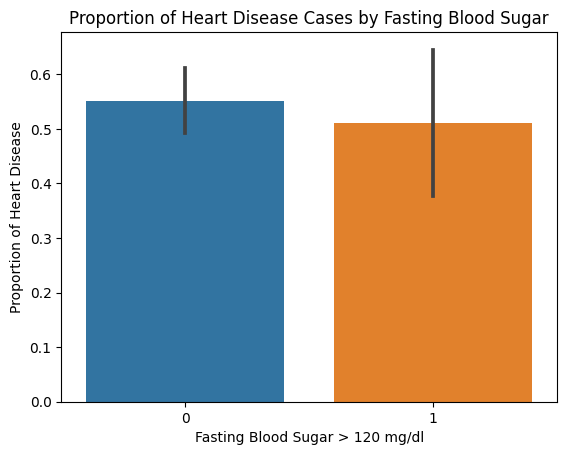

In [17]:
sns.barplot(x="fbs", y="target", data=heart)
plt.xlabel('Fasting Blood Sugar > 120 mg/dl')
plt.ylabel('Proportion of Heart Disease')
plt.title('Proportion of Heart Disease Cases by Fasting Blood Sugar')
plt.show()

<Axes: xlabel='sex', ylabel='age'>

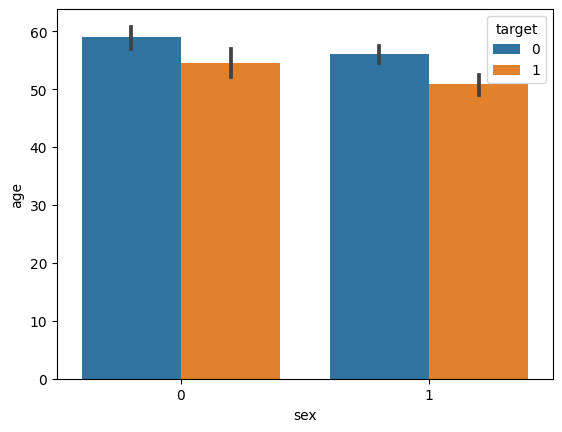

In [18]:
sns.barplot(x=heart['sex'],y=heart['age'],hue=heart['target'])

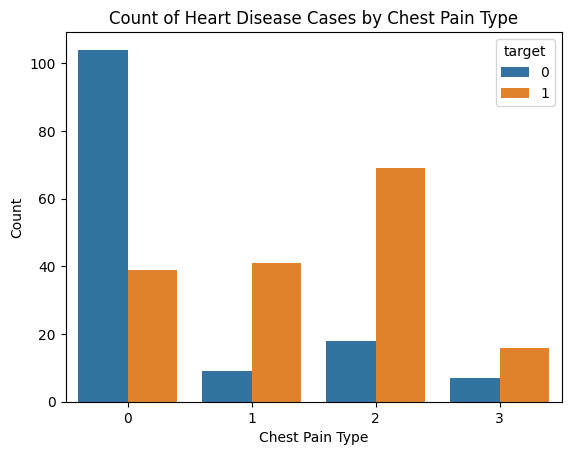

In [19]:
sns.countplot(x='cp', hue='target', data=heart)
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Chest Pain Type')
plt.show()

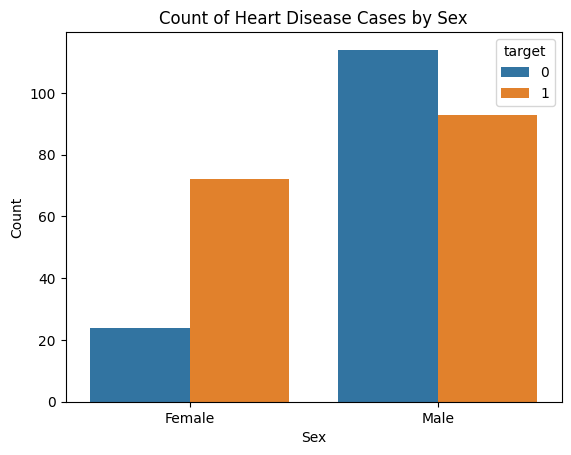

In [20]:
sns.countplot(x='sex', hue='target', data=heart)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title('Count of Heart Disease Cases by Sex')
plt.show()

In [21]:
fig = px.bar(heart, x='sex', y='target')
fig.update_layout(xaxis_title='Sex', yaxis_title='Target', title='Comparison of Target based on Sex')
fig.show()

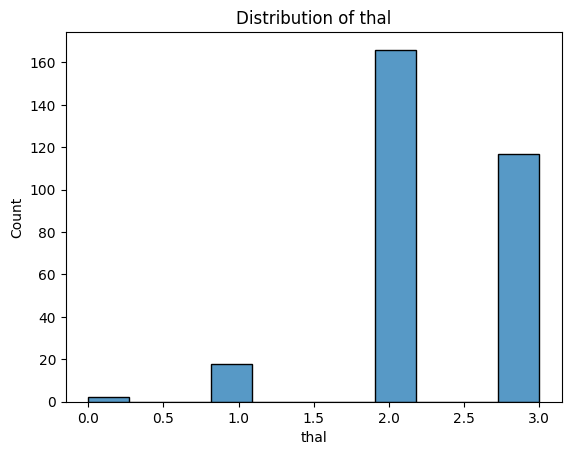

In [22]:
sns.histplot(heart["thal"])
plt.xlabel("thal")
plt.ylabel("Count")
plt.title("Distribution of thal")
plt.show()

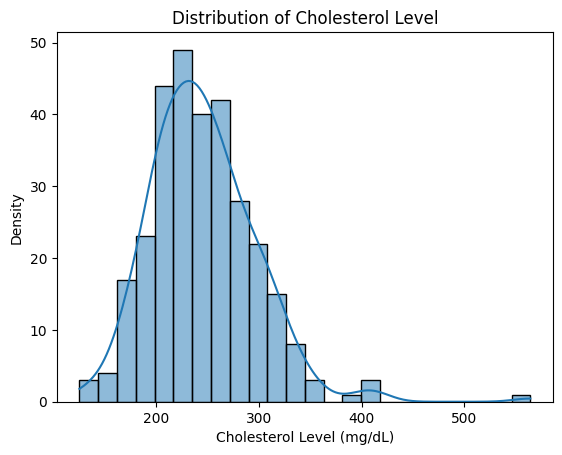

In [23]:
sns.histplot(heart["chol"], kde=True)
plt.xlabel("Cholesterol Level (mg/dL)")
plt.ylabel("Density")
plt.title("Distribution of Cholesterol Level")
plt.show()

In [24]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


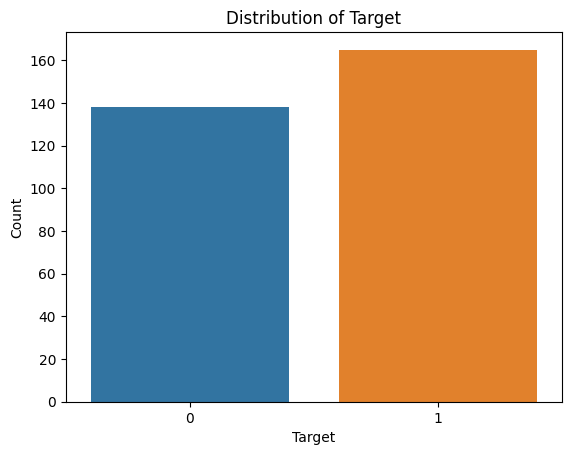

1    165
0    138
Name: target, dtype: int64


In [25]:
sns.countplot(x="target", data=heart)
plt.xlabel("Target")
plt.ylabel("Count")
plt.title("Distribution of Target")
plt.show()

target_temp = heart["target"].value_counts()
print(target_temp)

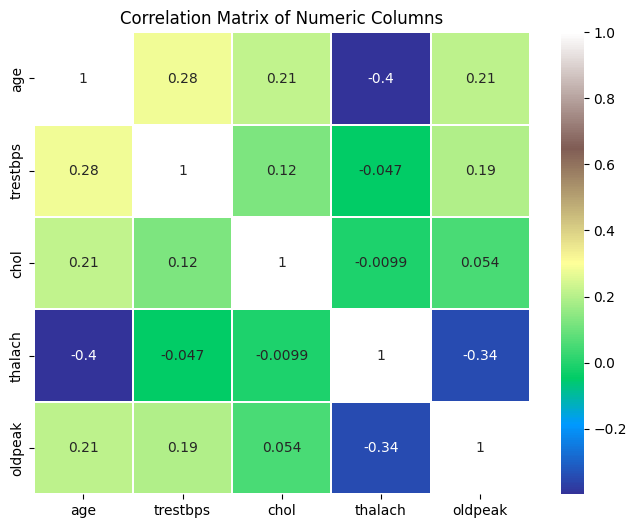

In [26]:
numeric_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(8, 6))
sns.heatmap(heart[numeric_columns].corr(), annot=True, cmap='terrain', linewidths=0.1)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

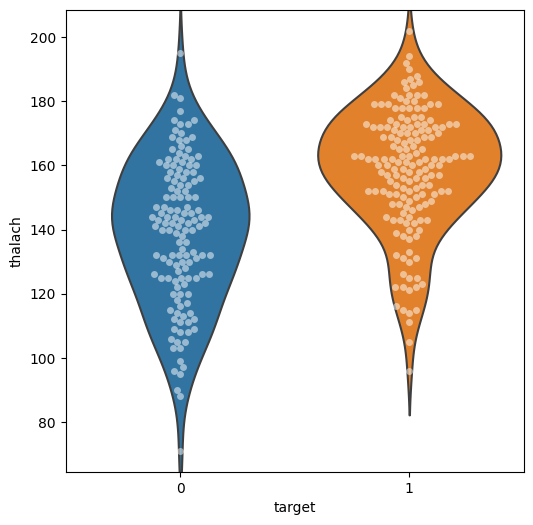

In [27]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
sns.violinplot(x="target", y="thalach", data=heart, inner=None)
sns.swarmplot(x="target", y="thalach", data=heart, color='w', alpha=0.5)

plt.show()

<ipython-input-28-d188264be06a>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-d188264be06a>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-28-d188264be06a>:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

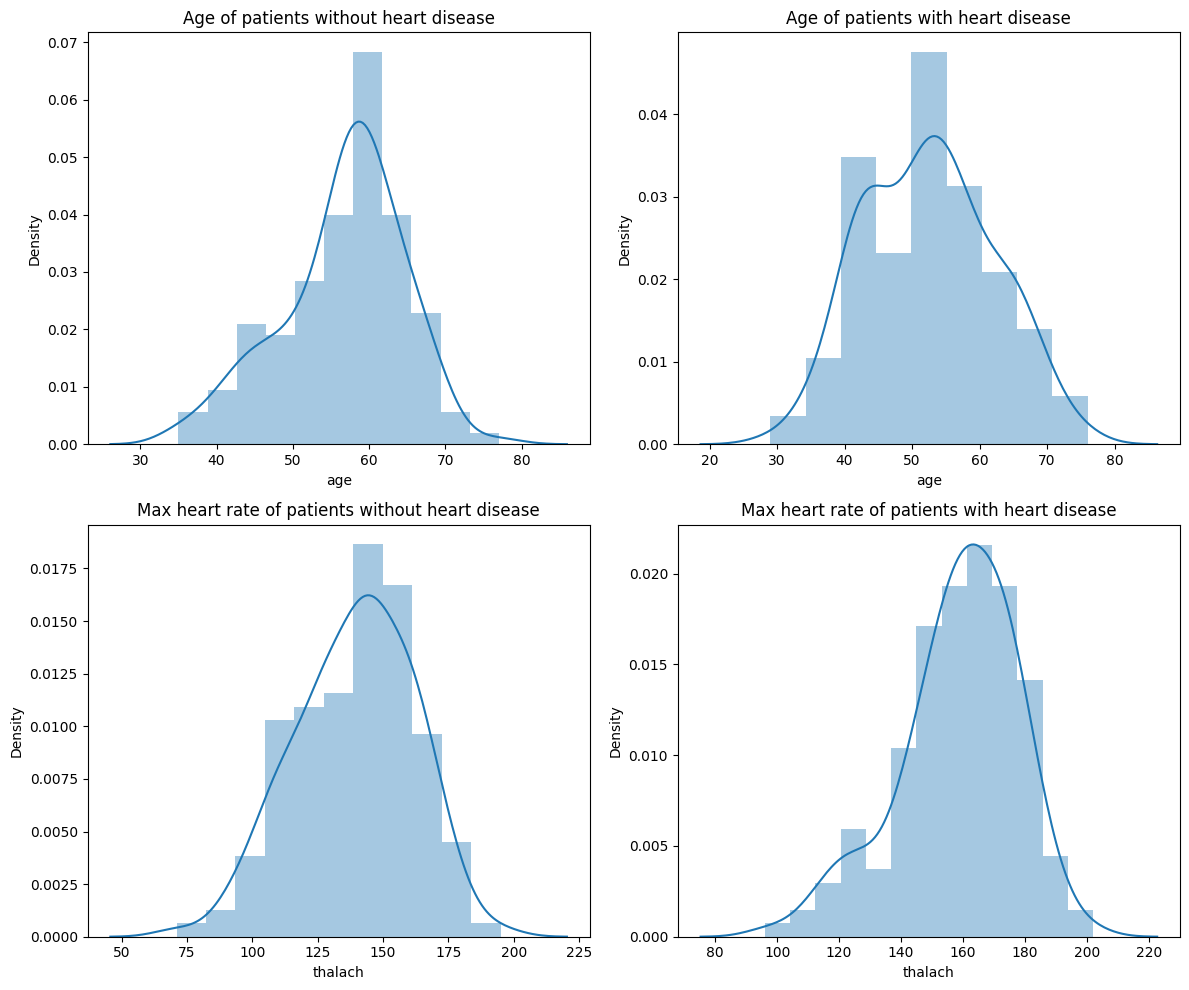

In [28]:
plt.figure(figsize=(12, 10))

plt.subplot(221)
sns.distplot(heart[heart['target']==0].age)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(heart[heart['target']==1].age)
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(heart[heart['target']==0].thalach)
plt.title('Max heart rate of patients without heart disease')

plt.subplot(224)
sns.distplot(heart[heart['target']==1].thalach)
plt.title('Max heart rate of patients with heart disease')

plt.tight_layout()
plt.show()

In [29]:
#DATA Preprocessing
########################################################################################
heart['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [30]:
heart['target'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: target, Length: 303, dtype: bool

In [31]:
heart['target'].unique()

array([1, 0])

In [32]:
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
X,y=heart,heart.target
X.drop('target',axis=1,inplace=True)
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()# Create an instance of the StandardScaler class
X = sc.fit_transform(X)  # Perform feature scaling on the feature data X
#X refers to the feature data that you want to standardize or scale using the StandardScaler class from scikit-learn (sklearn).

#In machine learning, X typically represents the feature matrix or the independent variables


In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [37]:
X_test

array([[ 0.18017482, -1.46841752, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.40075247,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 1.06248543,  0.68100522,  1.00257707, ..., -0.64911323,
        -0.71442887,  1.12302895],
       ...,
       [ 0.29046364,  0.68100522,  1.00257707, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-0.26098049,  0.68100522,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 0.62133012,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895]])

In [38]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [39]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (212, 13)
train_set_y shape: (212,)
test_set_x shape: (91, 13)
test_set_y shape: (91,)


In [40]:
# Model
# Decision Tree Classifier
scores_dict = {
    0: 'You do not have a heart disease.',
    1: 'You have heart disease.'
}



In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)


DecisionTreeClassifier()

In [44]:
prediction=dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, prediction) * 100
precision_dt = precision_score(y_test, prediction)
auc_roc_dt = roc_auc_score(y_test, prediction)
f1_score_dt = f1_score(y_test, prediction)

In [45]:
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print("Accuracy: {:.2f}%".format(accuracy_dt))
print("Precision: {:.2f}".format(precision_dt))
print("AUC-ROC Score: {:.2f}".format(auc_roc_dt))
print("F1-Score: {:.2f}".format(f1_score_dt))


Accuracy: 76.92%
Precision: 0.69
AUC-ROC Score: 0.78
F1-Score: 0.77


In [46]:
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.769


In [47]:
X_DT=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_DT_prediction=dt.predict(X_DT)

In [48]:
predicted_label = X_DT_prediction[0]
print(predicted_label)


0


In [49]:
print(scores_dict[int(X_DT_prediction[0])])


You do not have a heart disease.


In [51]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

In [52]:
k_range = range(1, 26)
scores = {}
h_score = 0       # to find the best score
best_k = 0        # to find the best k
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    prediction_knn = knn.predict(X_test)
    scores[k] = accuracy_score(y_test, prediction_knn)
    if scores[k] > h_score:
        h_score = scores[k]
        best_k = k

    scores_list.append(accuracy_score(y_test, prediction_knn))

print('The best value of k is {} with score: {}'.format(best_k, h_score))


The best value of k is 4 with score: 0.8571428571428571


In [53]:
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [57]:
prediction_knn=knn.predict(X_test)
accuracy_knn=accuracy_score(y_test,prediction_knn)*100
precision_knn = precision_score(y_test, prediction_knn)
auc_roc_knn = roc_auc_score(y_test, prediction_knn)
f1_score_knn = f1_score(y_test, prediction_knn)


In [58]:
print('Accuracy Score: {:.2f}%'.format(accuracy_knn))
print('Precision Score: {:.2f}'.format(precision_knn))
print('AUC-ROC Score: {:.2f}'.format(auc_roc_knn))
print('F1-Score: {:.2f}'.format(f1_score_knn))

scores_dict['KNeighborsClassifier'] = accuracy_knn

Accuracy Score: 85.71%
Precision Score: 0.80
AUC-ROC Score: 0.86
F1-Score: 0.85


In [59]:
print("Accuracy on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(knn.score(X_test, y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.857


In [60]:
X_knn=np.array([[63 ,1, 3,145,233,1,0,150,0,2.3,0,0,1]])
X_knn=sc.transform(X_knn)
X_knn_prediction=dt.predict(X_knn)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [61]:
X_knn

array([[ 0.9521966 ,  0.68100522,  1.97312292,  0.76395577, -0.25633371,
         2.394438  , -1.00583187,  0.01544279, -0.69663055,  1.08733806,
        -2.27457861, -0.71442887, -2.14887271]])

In [62]:
(X_knn_prediction[0])

1

In [63]:
print(scores_dict[int(X_knn_prediction[0])])

You have heart disease.


In [64]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

lg = LGBMClassifier(boosting_type='gbdt', n_estimators=5000, learning_rate=0.05, objective='binary', metric='accuracy',
                    is_unbalance=True, colsample_bytree=0.7, reg_lambda=3, reg_alpha=3, random_state=500, n_jobs=-1,
                    num_leaves=35)
lg.fit(X_train, y_train)
ypred = lg.predict(X_test)

accuracy_lg = accuracy_score(y_test, ypred) * 100
precision_lg = precision_score(y_test, ypred)
auc_roc_lg = roc_auc_score(y_test, ypred)
f1_score_lg = f1_score(y_test, ypred)

print('===============================================')
print('Accuracy Score: {:.2f}%'.format(accuracy_lg))
print('Precision Score: {:.2f}'.format(precision_lg))
print('AUC-ROC Score: {:.2f}'.format(auc_roc_lg))
print('F1-Score: {:.2f}'.format(f1_score_lg))
print('===============================================')

scores_dict['LGBMClassifier'] = accuracy_lg


Accuracy Score: 81.32%
Precision Score: 0.75
AUC-ROC Score: 0.82
F1-Score: 0.81


In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score, f1_score

model = RandomForestClassifier(n_estimators=100, random_state=10)
model.fit(X_train, y_train)
Y_predict = model.predict(X_test)

accuracy_rf = accuracy_score(y_test, Y_predict) * 100
precision_rf = precision_score(y_test, Y_predict)
auc_roc_rf = roc_auc_score(y_test, Y_predict)
f1_score_rf = f1_score(y_test, Y_predict)

print('Accuracy Score: {:.2f}%'.format(accuracy_rf))
print('Precision Score: {:.2f}'.format(precision_rf))
print('AUC-ROC Score: {:.2f}'.format(auc_roc_rf))
print('F1-Score: {:.2f}'.format(f1_score_rf))

scores_dict['RandomForestClassifier'] = accuracy_rf


Accuracy Score: 78.02%
Precision Score: 0.71
AUC-ROC Score: 0.79
F1-Score: 0.78


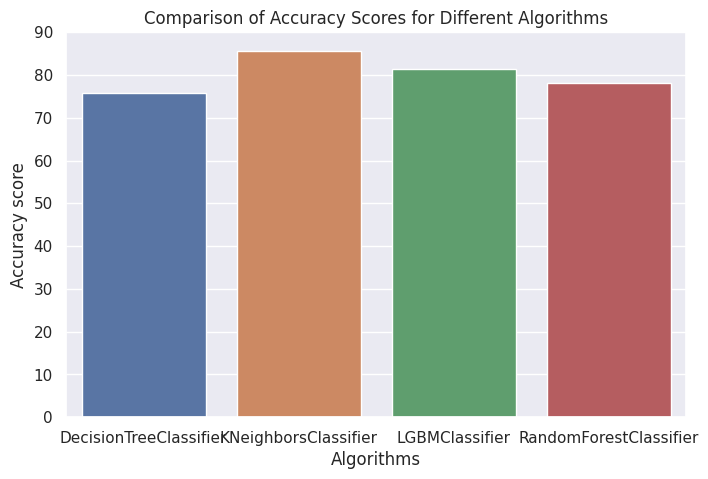

In [83]:
scores_dict = {
    'DecisionTreeClassifier':75.82417582417582 ,
    'KNeighborsClassifier': 85.71428571428571,
    'LGBMClassifier': 81.31868131868131,
    'RandomForestClassifier':  78.02868131868131
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
plt.title("Comparison of Accuracy Scores for Different Algorithms")

plt.show()

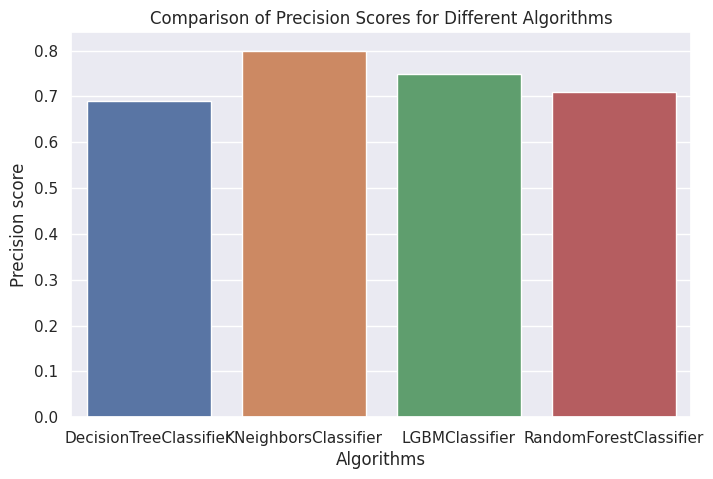

In [84]:
scores_dict = {
    'DecisionTreeClassifier':0.69 ,
    'KNeighborsClassifier': 0.80,
    'LGBMClassifier': 0.75,
    'RandomForestClassifier':  0.71
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("Algorithms")
plt.ylabel("Precision score")
plt.title("Comparison of Precision Scores for Different Algorithms")

plt.show()

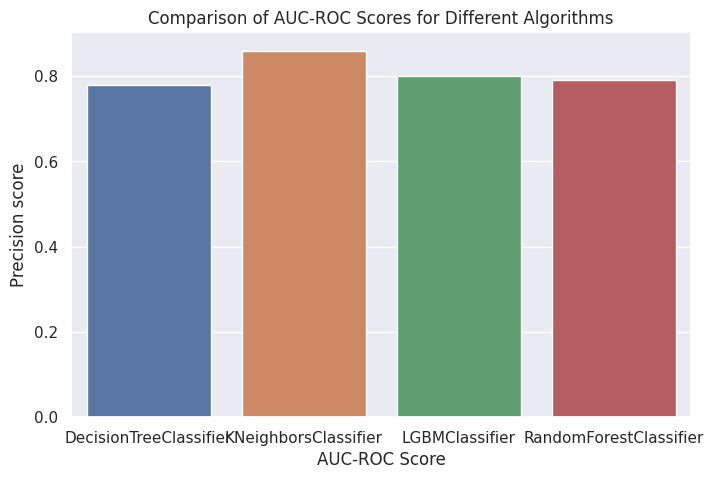

In [85]:
scores_dict = {
    'DecisionTreeClassifier':0.78 ,
    'KNeighborsClassifier': 0.86,
    'LGBMClassifier': 0.80,
    'RandomForestClassifier':  0.79
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("AUC-ROC Score")
plt.ylabel("Precision score")
plt.title("Comparison of AUC-ROC Scores for Different Algorithms")

plt.show()

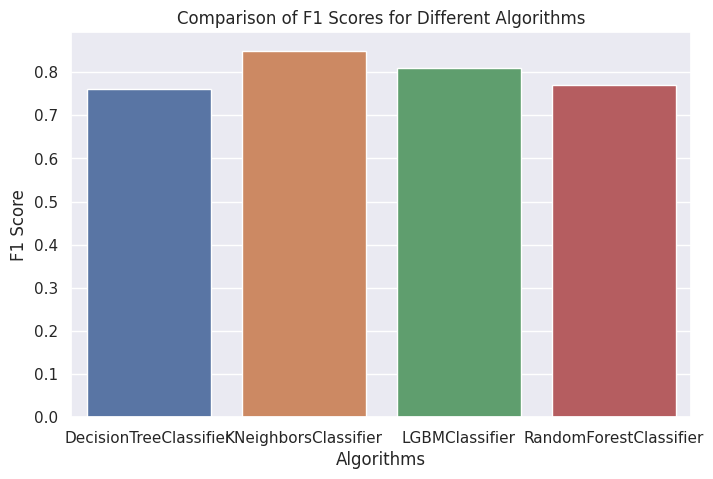

In [86]:
scores_dict = {
    'DecisionTreeClassifier':0.76 ,
    'KNeighborsClassifier': 0.85,
    'LGBMClassifier': 0.81,
    'RandomForestClassifier':  0.77
}

algo_name = list(scores_dict.keys())
scoress = list(scores_dict.values())

sns.set(rc={'figure.figsize': (8, 5)})
sns.barplot(x=algo_name, y=scoress)
plt.xlabel("Algorithms")
plt.ylabel("F1 Score")
plt.title("Comparison of F1 Scores for Different Algorithms")

plt.show()